# Lecture 10 & 11 -- Classification
In this lecture, students will learn about classification analysis and how to estimate classification models using the `scikit-learn` package. 

In [3]:
# Lecture Modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model, model_selection, metrics
from sklearn import tree, ensemble
import warnings
from IPython.display import display


## What is Classification Analysis?
Classificiation, like regression, entails prediction of a target variable given some set of input variables. The difference is that classification is focused on predicting a **label** or **class** whereas regression is concerned with predicting a continuous target variable. For example, instead of predicting the sale price of a house given its characteristics, we could predict whether or not the sale price was above or over 500,000 dollars. Other general examples include determining
- the subject of a photo
- whether a credit card transaction is fraudulent
- the genre of music of a particular song
- the political leaning of a newspaper article

## Binary Classification

**Binary clasisfication** refers to a classifications problem that has only two possible labels. All of these problems could be framed as binary classification problems. 
- A house price is either above or below 500,000 dollars
- A photo either contains a stop sign or not (image captcha)
- A credit card transaction is either fraudulent or not fraudulent
- A song is either classical or not.
- A newspaper article is either left or right leaning

## Multi-class Classification
**Multi-class Classification** entails predicting a label that can take on more than two values. All of the previous general problems could also be framed as multi-class classification problems.
- A house price can be in one of the three buckets: 
    - less than 350,000 dollars, 
    - between 350,000 and 500,00 dollars, or 
    - over 500,000 dollars. 
- A photo of a flower can be classified as one of over 100 different types of flowers
- A credit car transaction could be classified as:
    - Fraudulent
    - Not Fraudulent
    - Need Attention from Fraud Speciailist
- A song could be classified as one of many genres
- A newspaper article can be either:
    - far left
    - left
    - center
    - right
    - far right
    - apolitical

## Classification Algorithms
To begin, we will learn about various classification algorithms in the context of binary classification and extend them to multi-class problems later. 

Fortunately, both linear regresison and our tree-based algorithms have classification analog. 

## Logistic Regression
**Logistic regression** entails modeling the probability of an event taking place as a *transformed* linear function of many independent variables. For example, we can model the probability that the price of particular house is greater than 500,000 dollars as

$$
Pr(price_i > 500,000) = L\left(\beta_0 + \beta_1 * sqft\_living_i +  \beta_2 * bathrooms_i + \epsilon \right)
$$

where $L$ is the eponymous Logistic function defined as
$$
L(x) := \frac{1}{1 + e^{-x}}
$$.

Let's plot the logistic function below. 

Text(0.5, 1.0, 'Logistic Function')

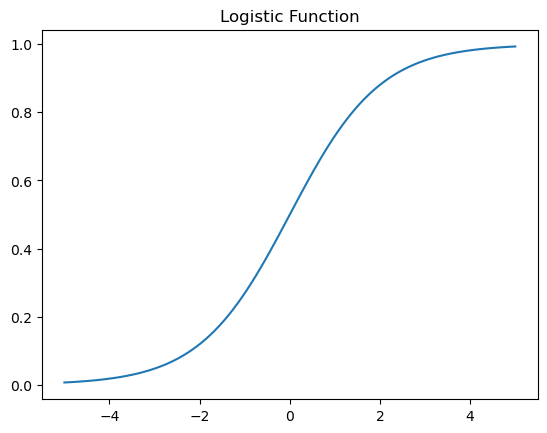

In [4]:
x = np.linspace(-5, 5, 100)
y = 1/(1+np.exp(-x))
plt.plot(x, y)
plt.title("Logistic Function")

## Useful Characteristics of Logistic Regression
This function is nice for binary clasisfication:
- Range of Logistic function is $(0,1)$
- Domain of Logistic function  is $(-\infty, \infty)$

The range is important because
- We are estimating probabilities which have to be between 0 and 1
- By giving us the probability of one label (e.g. $Pr(price > 500,000) = p$), we automatically get the probability of the other label (e.g. $Pr(price \leq 500,000) = 1-p$)

The domain simply allows the function can take any number as an input.

**Understanding Check**
- For what value of $x$ is $L(X)$ equal to $0$?
- What happens to $L(x)$ when $x$ moves to the right?
- What happens to $L(x)$ when $x$ moves to the left?

## Example: Recidivism
Recidivism refers to the tendency of convicted criminals to commit crimes after being released from prison. High recidivism rates likely reflect flaws in the criminal justice system and society at large. 

Recidivism, like all crime, is costly to the victims of the crime and also expends judicial, law enforcement, and correctional facility resources.   As a result, there is a lot of interest in ascertaining what types of policies and prison programs can help prevent inmates from reoffending when they are released. These include everything from efforts to destigmatize former criminals to job training programs for inmates. 

Being able to predict whether or not a criminal will reoffend at the time of sentencing might also useful. If a criminal is less likely of reoffend, a judge might find a lighter sentence to be more appropriate.  As you might be able to guess, this gets some into some ethically dubious territory, especially if factors such as an individual's race are used as inputs to that prediction algorithm. 

Before sentencing, some courts in the United States use a tool called COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) to predict the probability of a given criminal reoffending. [This article](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing) found that COMPAS was horribly biased against black defendants and over-predicted their probability of recidivism among other serious issue. 

Below, we download data used in the study. originating from the Broward County (Florida) Sheriff's office. It contains data on defendants, their characteristics, previous criminal records, whether or not they reoffended in the two years after their conviction, and their COMPAS score.  Let's take a look at the data. 



In [5]:
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis"
data_url += "/master/compas-scores-two-years.csv"

df = pd.read_csv(data_url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

First, we are going to observe how well the COMPAS score predicts whether a given individual reoffended within two years of being scored using logistic regression. 

The COMPAS prediction is captured by the `decile_score` variable which is on a scale from 1 to 10. A higher number means an individual has a greater risk of recidivism. 

`two_year_recid` is our dependent variable that is equal to 1 if a given individual reoffended within two years and 0 otherwise. 


In [6]:
# Define X and Y
X = df[["decile_score"]]
y = df["two_year_recid"]

# Split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

# Initialize logistic regression (don't worry about what the solver argument does)
logistic_model = linear_model.LogisticRegression(solver="lbfgs", penalty = "none")

# Fit model on training data
logistic_model.fit(X_train, y_train)

# Get Coeffs
beta_0 = logistic_model.intercept_[0]
beta_1 = logistic_model.coef_[0][0]

print(f"Fit model: Pr(recid) = L({beta_0:.4f} + {beta_1:.4f} decile_score)")

Fit model: Pr(recid) = L(-1.4513 + 0.2733 decile_score)


## Interpretation
What does a positive coefficient say about the relationship between `decile_score` and the probability of two-year recidivism? Given what this score is being used for, does that make sense?

## Time to Classify
The Logistic Regression alone does not tell us whether or not someone will reoffend within two years. To do this, we need to establish a **threhold** or **cutoff** value on the probabilities we estimate. For example, if we choose a cutoff of $Pr(recid) = .5$, we have the followin classification scheme:

$$
\hat{recid} = \left\{\begin{array}{cc} 1 & \text{if } Pr(recid) > .5 \\ 0 & \text{if } Pr(recid)  \leq .5\end{array}\right.
$$

where 1 indicates that the individual will reoffend. In this model, person with a decile score such that $-1.3705 + 0.2623 \text{ decile_score} > 0$ will be classified as reoffender. In fact with some algebraic manipulation, we can see this happens whenver somebody has a decile score of 6 or more. Make sure you understand why this is. 


While .5 seems like a reasonable cutoff, it is actually arbitrary. Such a cutoff might not actually result in the "best" predictions. Before adjusting this cutoff boundary and talking about what "best" means, let's add another independent variable!

In [7]:
# Redefine X
X = df[["decile_score", "age"]]

# Split into training and testing sample
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Fit logistic regression model
logistic_age_model = linear_model.LogisticRegression(solver="lbfgs", penalty = "none")
logistic_age_model.fit(X_train, y_train)

beta_0 = logistic_age_model.intercept_[0]
beta_1, beta_2 = logistic_age_model.coef_[0]

print(f"Fit model: Pr(recid) = L({beta_0:.4f} + {beta_1:.4f} decile_score + {beta_2:.4f} age)")


Fit model: Pr(recid) = L(-0.8508 + 0.2470 decile_score + -0.0130 age)


## Prediction
Below, we can see two of `logistic_age_model`'s prediction methods. One predicts the label based on some cutoff and the other predicts the probabilities for each label.

To predict labels, `sklearn` enforces a default cutoff as .5.

In [8]:
print(logistic_age_model.predict(X_train.iloc[15:25, :]))
print(logistic_age_model.predict_proba(X_train.iloc[15:25, :]))



[0 0 0 0 1 0 0 0 0 0]
[[0.62877808 0.37122192]
 [0.75738531 0.24261469]
 [0.63181687 0.36818313]
 [0.66176658 0.33823342]
 [0.30183823 0.69816177]
 [0.54379396 0.45620604]
 [0.66143101 0.33856899]
 [0.67013601 0.32986399]
 [0.75977354 0.24022646]
 [0.56953454 0.43046546]]


## Interpretation
Decile Score has a very similar relationship with the probability of recidivism whereas age seems to be slightly negatively correlated with the changes of recidivism. 

## Visualization
We are going to visualize the problem now. Will consist of two parts
- A scatter plot on `decile_score`/`age` axes indicating whether an individual reoffendes (blue dots) or not (orange dots) within two years
- A contour plot that is orange for the values of  `decile_score`/`age` that make it predict


In [14]:
print(x2)

[[  0.          0.          0.        ...   0.          0.
    0.       ]
 [  0.1001001   0.1001001   0.1001001 ...   0.1001001   0.1001001
    0.1001001]
 [  0.2002002   0.2002002   0.2002002 ...   0.2002002   0.2002002
    0.2002002]
 ...
 [ 99.7997998  99.7997998  99.7997998 ...  99.7997998  99.7997998
   99.7997998]
 [ 99.8998999  99.8998999  99.8998999 ...  99.8998999  99.8998999
   99.8998999]
 [100.        100.        100.        ... 100.        100.
  100.       ]]


<AxesSubplot:xlabel='decile_score', ylabel='age'>

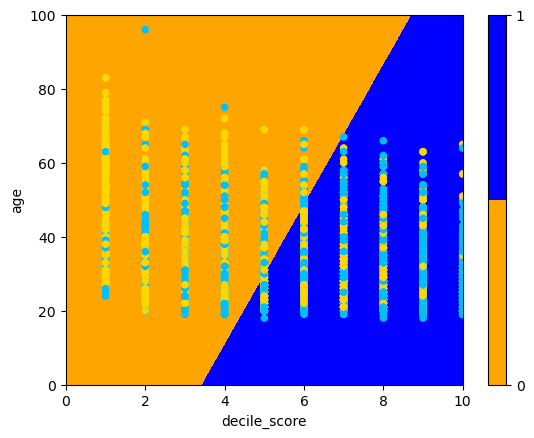

In [9]:

# Intialize Figure
fig, ax = plt.subplots()

# Scatter Plot

ax.set_xlabel("decile_score")
ax.set_ylabel("age")

# Make 1d grids
x1_grid = np.linspace(0, 10, 1000)
x2_grid = np.linspace(0, 100, 1000)

# Make 2d grid out of 1d grids
x1, x2 = np.meshgrid(x1_grid, x2_grid)
# Predict on these grids (catch warnings about X names)
with warnings.catch_warnings(record=True):
    Z = logistic_age_model.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x1.shape)
im = ax.contourf(x1, x2, Z, colors = ["orange", "blue"], levels = 1)
fig.colorbar(im, ax=ax, ticks=np.unique(Z))
scatter_colors = ["gold" if value == 0 else "deepskyblue" for value in y_train ]
X_train.plot.scatter(x="decile_score", y="age", c = scatter_colors, ax=ax)


In [8]:
np.where(y_train == 0)[0]

array([   0,    2,    4, ..., 5406, 5407, 5408], dtype=int64)

## Logistic Regression Geometry
It is clear that our logistic regression is not predicting everything perfectly. If it were, we would only see blue dots in the blue region and orange dots in the orange region. 

Note how our **decision boundary** (the border of the blue and orange regions) is a line in this two-dimensional coordinate space. 

This means logistic regression can only perfectly classify the data when the labels are **linearly separable**. In two-dimensions, this means they can be separated by a line. In three-dimensions, a plane. The more dimensions you have, the "easier" it is to separate data.

## Geometry of Cutoff Value
Decreasing the cutoff value shifts the line left. Increasing it shifts the line right. The slope does **not** change. To change the cutoff value, we use `.predict_proba()` and compare its second column to the cutoff value. 

In [9]:
# Redefine X
X = df[["decile_score", "age"]]

# Split into training and testing sample
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Fit logistic regression model
logistic_age_model = linear_model.LogisticRegression(solver="lbfgs", penalty = "none")
logistic_age_model.fit(X_train, y_train)

LogisticRegression(penalty='none')

<AxesSubplot:xlabel='decile_score', ylabel='age'>

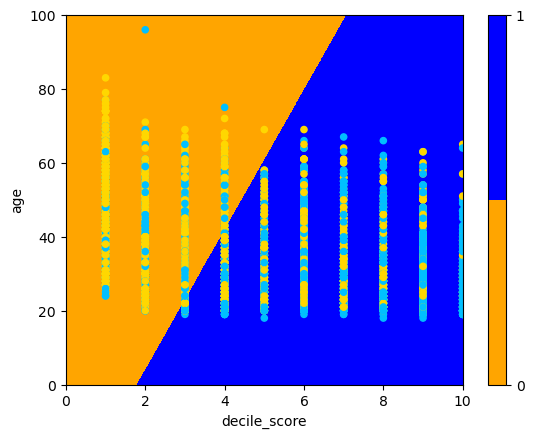

In [10]:
cutoff = .4
# Intialize Figure
fig, ax = plt.subplots()

# Scatter Plot

ax.set_xlabel("decile_score")
ax.set_ylabel("age")

# Make 1d grids
x1_grid = np.linspace(0, 10, 1000)
x2_grid = np.linspace(0, 100, 1000)

# Make 2d grid out of 1d grids
x1, x2 = np.meshgrid(x1_grid, x2_grid)
# Predict on these grids (catch warnings about X names)
with warnings.catch_warnings(record=True):
    Z = logistic_age_model.predict_proba(np.c_[x1.ravel(), x2.ravel()])[:,1] >= cutoff
Z = Z.reshape(x1.shape)
im = ax.contourf(x1, x2, Z, colors = ["orange", "blue"], levels = 1)
fig.colorbar(im, ax=ax, ticks=np.unique(Z))
scatter_colors = ["gold" if value == 0 else "deepskyblue" for value in y_train ]
X_train.plot.scatter(x="decile_score", y="age", c = scatter_colors, ax=ax)


## Polynomials
We can add polynomial terms (`age_sq`, `decile_sq`) as we did with linear regression and interaction terms (`age_decile`) to make these lines more flexible.

In [11]:
# Redefine X
X_sq = df[["decile_score", "age"]]
with warnings.catch_warnings(record=True):
    X_sq["decile_sq"] = X_sq["decile_score"] ** 2
    X_sq["age_sq"] = X_sq["age"] ** 2
    X_sq["age_decile"] = X_sq["decile_score"] * X_sq["age"] 

# Split into training and testing sample
X_sq_train, X_sq_test, y_sq_train, y_sq_test = model_selection.train_test_split(
    X_sq, y, test_size=0.25, random_state=42
)

# Fit logistic regression model
logistic_age_model_sq = linear_model.LogisticRegression(solver="lbfgs", penalty = "none")
logistic_age_model_sq.fit(X_sq_train, y_sq_train)

LogisticRegression(penalty='none')

<AxesSubplot:xlabel='decile_score', ylabel='age'>

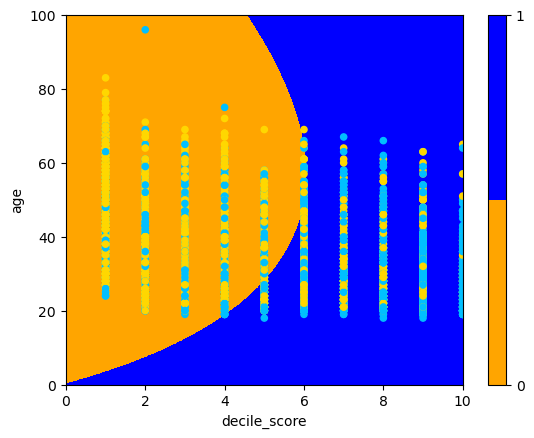

In [12]:

# Intialize Figure
fig, ax = plt.subplots()

# Scatter Plot

ax.set_xlabel("decile_score")
ax.set_ylabel("age")

# Make 1d grids
x1_grid = np.linspace(0, 10, 1000)
x2_grid = np.linspace(0, 100, 1000)

x1, x2 = np.meshgrid(x1_grid, x2_grid)
with warnings.catch_warnings(record=True):
    Z = logistic_age_model_sq.predict(np.c_[x1.ravel(), x2.ravel(), x1.ravel() ** 2, x2.ravel() ** 2, x1.ravel() * x2.ravel()])
Z = Z.reshape(x1.shape)
im = ax.contourf(x1, x2, Z, colors = ["orange", "blue"], levels = 1)
fig.colorbar(im, ax=ax, ticks=np.unique(Z))
scatter_colors = ["gold" if value == 0 else "deepskyblue" for value in y_train ]
X_train.plot.scatter(x="decile_score", y="age", c = scatter_colors, ax=ax)



## Model Evaluation
In general, choosing different cutoffs amounts to choosing different classification models. This is also true for models that have different independent variables or coefficient estimates.

As a result, we want some way to evaluate these models both in-sample and out-of-sample using various metrics.

## Accuracy
The most obvious measure of fit for a classification model is **accuracy**. This is the fraction of correct prediction over total predictions. We can use the `.score()` method to get the accuracy of our models. They are ultimately very similar (which should not surprise you given their geometrical overlap). Since the test accuracies and trainign accuracies are so similar, we are likely underfitting with both models. 

In [13]:
# Just linear terms
train_acc = logistic_age_model.score(X_train, y_train)
test_acc = logistic_age_model.score(X_test, y_test)

# Quadratic and interaction terms
train_acc_sq = logistic_age_model_sq.score(X_sq_train, y_sq_train)
test_acc_sq = logistic_age_model_sq.score(X_sq_test, y_sq_test)


print("Model with linear terms")
print(f"Training Accuracy: {train_acc*100:.2f}% , Test Accuracy: {test_acc*100:.2f}%")
print("")
print("Model with quadratic and interaction terms")
print(f"Training Accuracy: {train_acc_sq*100:.2f}% , Test Accuracy: {test_acc_sq*100:.2f}%")

Model with linear terms
Training Accuracy: 65.34% , Test Accuracy: 66.80%

Model with quadratic and interaction terms
Training Accuracy: 65.32% , Test Accuracy: 66.91%


## Precision & Recall
Sometimes Accuracy is not enough, especially in the face of **class imbalance** -- when you have more (or significantly more) of one label than another. For example, we might want to classify whether or not a person has a very rare disease. If it appears in .001% of the population, a model that always predicts false would have a 99.999% accuracy rate, but would not catch the disease when a patient actually needs an intervention. In this case, we need to make a distinction between the types of predictions our model can make:
- true positives (predict the disease and they have it)
- true negatives (predict no disease and they do not have it)
- false positives (predict the disease and they do not have it)
- false negatives (predict no disease and they do have it)

Accuracy does not distniguish between true positives and true negatives nor false positives and false negatives, but these types of errors can have very different real life consequences. To account for such nuance, there are two popular metrics:
- **Precision** is equal to porpotion of true positives out of the total number of positive predictions. Answers the question: when the mode predicted true, how often was it right?
- **Recall** is equal to the number of true positives over the number of actual positives. 
The model we described that always guesses negative always has zero true positives. Consequently, it always has 0 precision and 0 recall.

When you want to consider both metrics, the **F1 Score** serves as a useful composite metric.
$$F1 = 2 \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$
SciKit-learn has a built in functionality to calculate these numbers for us. We demonstrate 

In [14]:
print("Model with Linear Terms -- In-sample")
report = metrics.classification_report(
    y_train, logistic_age_model.predict(X_train),
    target_names=["no recid", "recid"]
)
print(report)

print("")
print("Model with Linear Terms -- Out-of-sample")
report = metrics.classification_report(
    y_test, logistic_age_model.predict(X_test),
    target_names=["no recid", "recid"]
)
print(report)

Model with Linear Terms -- In-sample
              precision    recall  f1-score   support

    no recid       0.67      0.73      0.69      2940
       recid       0.64      0.57      0.60      2470

    accuracy                           0.65      5410
   macro avg       0.65      0.65      0.65      5410
weighted avg       0.65      0.65      0.65      5410


Model with Linear Terms -- Out-of-sample
              precision    recall  f1-score   support

    no recid       0.70      0.73      0.71      1023
       recid       0.62      0.59      0.61       781

    accuracy                           0.67      1804
   macro avg       0.66      0.66      0.66      1804
weighted avg       0.67      0.67      0.67      1804



## Precision-Recall Tradeoff
Frequently, increasing precision comes at a cost of decreasing recall. This tradeoff is inherent when adjusting our threshold value for fixed coefficient values. 

As the threshold gets lower, the algorithm is more likely to guess true. This can result in two types of reclassifications:

- False negative to True Positive
- True negative to False Positive

In the first case, **precision and recall increase**. In the second case, **recall stays the same** and **precision decreases**. It is good to be aware of this tradeoff. If you want to learn more, look at QuantEcon's explanation of the **ROC curve** and **AUC cross-validation** [here](https://datascience.quantecon.org/tools/classification.html).

### Multinomial Logistic Regresison
Multinomial logistic regression allows us to model prediction problems when there are three or more classes. 

We will not go over the mathematical details because they are a little bit more involved. Ultimately, it involves many linear predictor functions (like the one found in logistic regression) whose values can be combined into the multinomial analog of the logistic function resulting in the probability of a given class being selected.

We will, however, discuss how we estimate a multinomial logistic regression in `sklearn`. In the multi-class, the concepts of false positives, false negatives, etc. are more complicated. This might make it easier to rely on accuracy over ROC and AUC implementations that require some workarounds. As a result, it is important to have a balanced dataset.

Below, we use data on an individual to predict their decile score which can take on interger values from 1 to 10. 

In [15]:
list(df)

['id',
 'name',
 'first',
 'last',
 'compas_screening_date',
 'sex',
 'dob',
 'age',
 'age_cat',
 'race',
 'juv_fel_count',
 'decile_score',
 'juv_misd_count',
 'juv_other_count',
 'priors_count',
 'days_b_screening_arrest',
 'c_jail_in',
 'c_jail_out',
 'c_case_number',
 'c_offense_date',
 'c_arrest_date',
 'c_days_from_compas',
 'c_charge_degree',
 'c_charge_desc',
 'is_recid',
 'r_case_number',
 'r_charge_degree',
 'r_days_from_arrest',
 'r_offense_date',
 'r_charge_desc',
 'r_jail_in',
 'r_jail_out',
 'violent_recid',
 'is_violent_recid',
 'vr_case_number',
 'vr_charge_degree',
 'vr_offense_date',
 'vr_charge_desc',
 'type_of_assessment',
 'decile_score.1',
 'score_text',
 'screening_date',
 'v_type_of_assessment',
 'v_decile_score',
 'v_score_text',
 'v_screening_date',
 'in_custody',
 'out_custody',
 'priors_count.1',
 'start',
 'end',
 'event',
 'two_year_recid']

In [16]:
# Create sex indicator variable
df["sex_indicator"] = [1 if s == "Female" else 0 for s in df.sex]

# Define X and Y
X_m = df[["priors_count", "age", "juv_fel_count", 
        "juv_misd_count", "juv_other_count", "priors_count", 
        "is_violent_recid", "sex_indicator"]]

y_m = df["decile_score"]

# Split data
X_m_train, X_m_test, y_m_train, y_m_test = model_selection.train_test_split(X_m, y_m, test_size=0.25)

# Initialize logistic regression (don't worry about what the solver argument does) this time we're using the default penalty
multinomial_model = linear_model.LogisticRegression(solver="lbfgs", max_iter = 5000)

# Fit model on training data
multinomial_model.fit(X_m_train, y_m_train)




LogisticRegression(max_iter=5000)

In [17]:
print(multinomial_model.score(X_m_train, y_m_train))
print(multinomial_model.score(X_m_test, y_m_test))

0.31053604436229204
0.31097560975609756


## Classification Trees & Random Forest Classifiers
With some minor modifications, we can use the tree algorithms from the regression section for classification as well. We will jump right into multiclass prediction as it is functionally similar to binary label prediction.

## Classification Trees
Like regresison trees, classification trees are grown by iteratively splitting up our data. Unlike regression trees, classification trees need to predict labels. Since we are not dealing with ordered numeric values (e.g price, age, etc.) aymore we need to move away from mean-squared error (MSE) in favor of multi-label classification metrics. 

A common choice for label prediction is to take the mode (the most common) label within a given node. With that as a mapping, we will look at using two metrics to replace MSE as our criteria (loss) function when growing the tree:
- gini impurity
- entropy

We will discuss all of these momentarily. First, let's use a decision tree to try and predict recidivism and plot its contours plot. We will use various max_depths and see which one performs best out of sample. 

<Figure size 2000x2000 with 0 Axes>

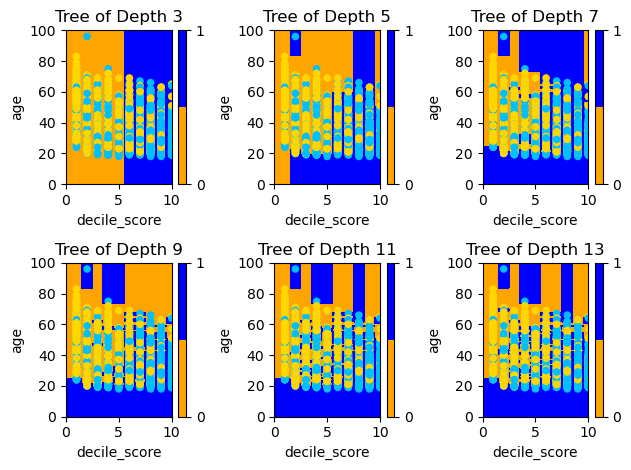

In [18]:
# Initalize List of Decision Tree 
trees = []
depths = [3, 5, 7, 9, 11, 13]
# Append fit regression trees to list
for depth in depths:
    trees.append(tree.DecisionTreeClassifier(max_depth = depth).fit(X_train, y_train))


# Plot
# Make 1d grids
x1_grid = np.linspace(0, 10, 1000)
x2_grid = np.linspace(0, 100, 1000)

# Make 2d grid out of 1d grids
x1, x2 = np.meshgrid(x1_grid, x2_grid)


# Intialize Figure
plt.figure(figsize=(20,20))
fig, axes = plt.subplots(2,3)
for (i,ax) in enumerate(axes.flat):
    ax.set_title(f"Tree of Depth {depths[i]}")
    ax.set_xlabel("decile_score")
    ax.set_ylabel("age")
    with warnings.catch_warnings(record=True):
        Z = trees[i].predict(np.c_[x1.ravel(), x2.ravel()])
    Z = Z.reshape(x1.shape)
    im = ax.contourf(x1, x2, Z, colors = ["orange", "blue"], levels = 1)
    fig.colorbar(im, ax=ax, ticks=np.unique(Z))
    scatter_colors = ["gold" if value == 0 else "deepskyblue" for value in y_train ]
    X_train.plot.scatter(x="decile_score", y="age", c = scatter_colors, ax=ax)
fig.tight_layout()


In [19]:
for (i, tm) in enumerate(trees):
    print(f"Training Accuracy for Tree of Depth {depths[i]} is {tm.score(X_train, y_train): .4f}")
    print(f"Testing Accuracy for Tree of Depth {depths[i]} is {tm.score(X_test, y_test): .4f}")

Training Accuracy for Tree of Depth 3 is  0.6543
Testing Accuracy for Tree of Depth 3 is  0.6680
Training Accuracy for Tree of Depth 5 is  0.6582
Testing Accuracy for Tree of Depth 5 is  0.6680
Training Accuracy for Tree of Depth 7 is  0.6682
Testing Accuracy for Tree of Depth 7 is  0.6663
Training Accuracy for Tree of Depth 9 is  0.6771
Testing Accuracy for Tree of Depth 9 is  0.6685
Training Accuracy for Tree of Depth 11 is  0.6835
Testing Accuracy for Tree of Depth 11 is  0.6630
Training Accuracy for Tree of Depth 13 is  0.6874
Testing Accuracy for Tree of Depth 13 is  0.6602


## Tree Visualization
Let's visualize the tree of depth 3.

In [20]:
plt.figure(figsize=(120,120)) 
tree.plot_tree(trees[0], max_depth = 4);

In [21]:
df["priors_count"].max()

38

## Multiclass Labels
We can also do this with multi class labels. Now we try and predict the `decile_score` using `age` 

<Figure size 2000x2000 with 0 Axes>

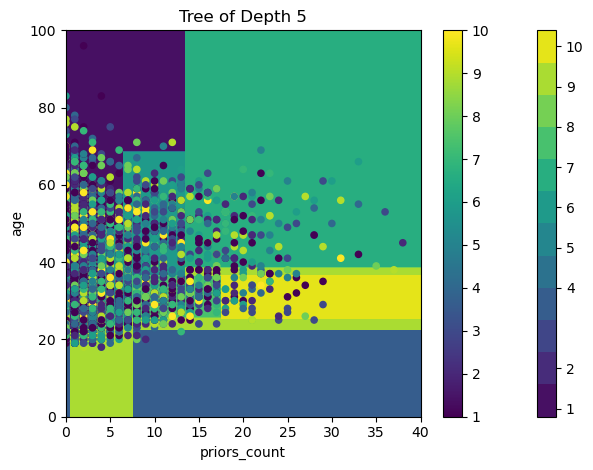

In [22]:
X_mt = df[["priors_count", "age"]]
y_mt = df["decile_score"]

# Split data
X_mt_train, X_mt_test, y_mt_train, y_mt_test = model_selection.train_test_split(X_mt, y_mt, test_size=0.25)


# Initialize and Fit Tree
multi_tree = tree.DecisionTreeClassifier(max_depth = 5).fit(X_mt_train, y_mt_train)

# Plot
# Make 1d grids
x1_grid = np.linspace(0, 40, 1000)
x2_grid = np.linspace(0, 100, 1000)

# Make 2d grid out of 1d grids
x1, x2 = np.meshgrid(x1_grid, x2_grid)


# Plot Boundary
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()

ax.set_title(f"Tree of Depth 5")
ax.set_xlabel("priors_count")
ax.set_ylabel("age")
with warnings.catch_warnings(record=True):
    Z = multi_tree.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x1.shape)
im = ax.contourf(x1, x2, Z, levels = 11)
fig.colorbar(im, ax=ax, ticks=np.unique(Z))

X_mt_train.plot.scatter(x="priors_count", y="age", c = y_m_train, ax=ax, cmap = "viridis")
fig.tight_layout()

We can quickly examine in-sample and out-of-sample accuracy

In [23]:
print(multi_tree.score(X_mt_train, y_mt_train))
print(multi_tree.score(X_mt_test, y_mt_test))

0.3157116451016636
0.2982261640798226


## Gini Impurity
To inform split decisions, `DecisionTreeClassifier()` **minimizes** gini impurity by default. Consider the case when you have $k$ possible classes. Then, the **gini impurity** of a given set of observations is 
$$
G = 1 - \sum_{i=1}^{k}p_i^2
$$
where 
$$p_i := \frac{\text{# of observations of class }k}{\text{# of observations in set }}$$

When all observations are of a single class, $G=0$ (think about why this is). If many classes share similar representation, the gini impurity will be closer to 1. The best split is the one that results in the two subsets of data that have the lowest **weighted** Gini Impurity. That is, each subset's gini impurity is weighted by the number of data points in that subset.

## Entropy
**Entropy** is incredibly similar but uses a slightly different functional form. Just like gini impurity, the best split when considering entropy is the one that results in the two subsets of data that have the lowest **weighted** entropy.
$$
E = -\sum_{i=1}^{k}p_i \log\left(p_i\right)
$$

## Random Forest Classifier
Random Forest Classifiers are basically the same as their regression counterpart. To predict a given observation, the forest sends the observation to each tree. Each tree finds the terminal node in which the given observation belongs and returns $p_i$ for each of the classes in that terminal node. Then, the forest finds the average $p_i$ across all classes and selects the class with the highest **average** $p_i$. 

Below, we benchmark the Random forest classifier against the multiclass logistic regression for the decile score prediction problem. 

In [24]:
# Initialize model
rf_mclass = ensemble.RandomForestClassifier(n_estimators = 1000, max_depth = 7)
rf_mclass.fit(X_m_train, y_m_train)


RandomForestClassifier(max_depth=7, n_estimators=1000)

In [25]:
print(multinomial_model.score(X_m_train, y_m_train))
print(multinomial_model.score(X_m_test, y_m_test))

print(rf_mclass.score(X_m_train, y_m_train))
print(rf_mclass.score(X_m_test, y_m_test))

0.31053604436229204
0.31097560975609756
0.39704251386321626
0.3120842572062084
